# PROYECTO FINAL "Depresión en Estudiantes De La India"

## Instituto Politécnico Nacional
### Unidad Profesional Interdisciplinaria en Ingeniería y Tecnologías Avanzadas UPIITA

- Guerra López Oscar
- Pérez Medellín Bruno
- Rodríguez Frausto Ricardo Josué




## Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN
import re
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
#Cargamos el Dataset
datostristes = pd.read_csv("SDD.csv")
print(f"El conjunto de datos original contiene: {datostristes.shape[0]} regitros")

El conjunto de datos original contiene: 27901 regitros


## Graficas para el análisis

### Histogramas con distribuciones de densidad

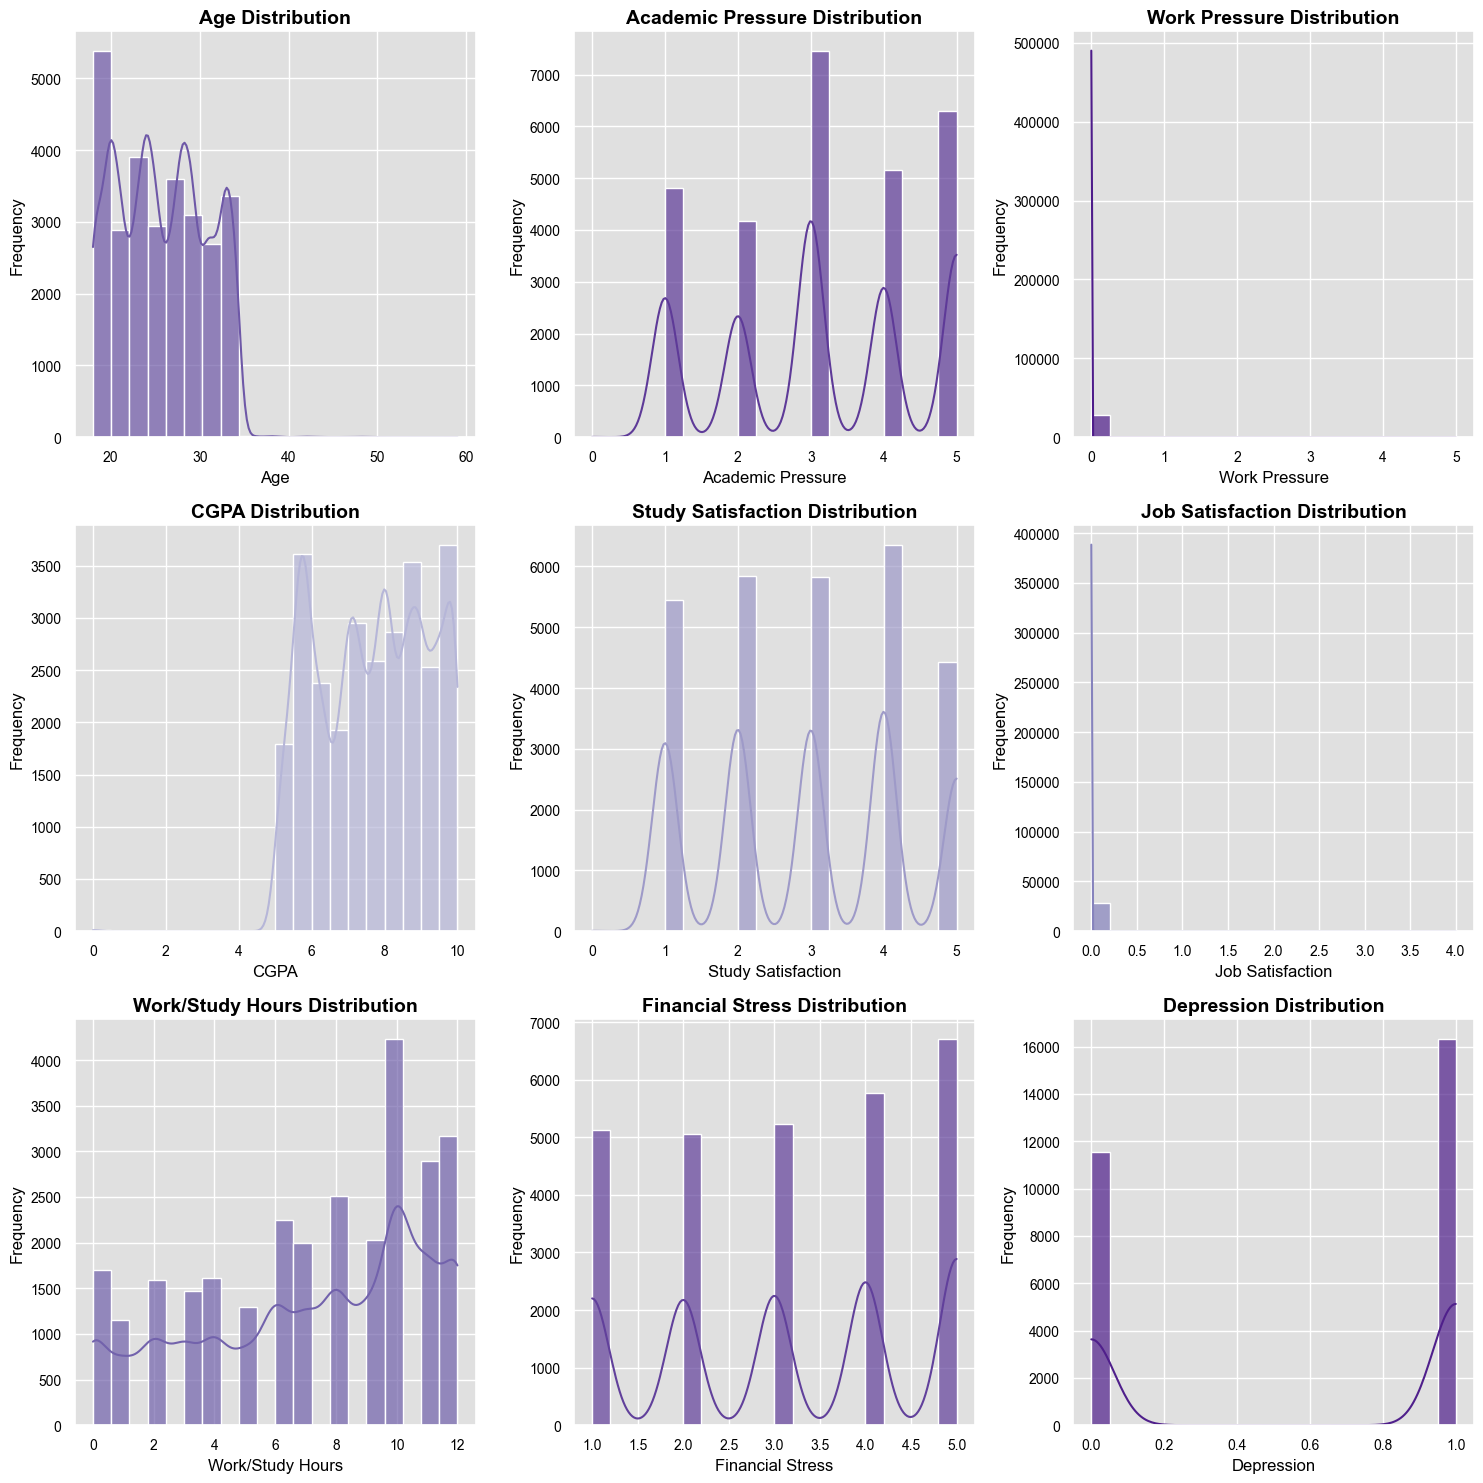

In [3]:
# Analizarémos las columnas numéricas 
warnings.filterwarnings("ignore")
numerical_columns = datostristes.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']
# Configuramos las gráficas de las gráficas
sns.set(style="darkgrid")
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()
colors = sns.color_palette("Purples", num_cols)
dark_colors = sns.color_palette("Purples", 10)[7:10]  
colors[:3] = dark_colors  
# Graficamos las columnas numericas
for i, col in enumerate(numerical_columns):
    sns.histplot(datostristes[col], kde=True, bins=20, color=colors[i], ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col} Distribution', fontsize=14, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=12, color='black')
    axes[i].set_ylabel('Frequency', fontsize=12, color='black')
    axes[i].tick_params(axis='both', which='major', labelsize=10, colors='black')
    axes[i].set_facecolor('#e0e0e0')  # Light gray background for each subplot
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

- Se observa que la mayoría de las personas en el conjunto de datos están en un rango de **edad** específico (probablemente entre 18 y 30 años).
- Hay picos en ciertos valores, lo que indica que muchas personas reportan niveles específicos de **presión académica**.
- Lo que indica que muchas personas experimentan poca o ninguna **presión laboral** es que la mayoría de los datos están concentrados cerca de 0.
- La distribución parece estar sesgada hacia la derecha, indicando que muchos estudiantes tienen un **CGPA** más alto.
- La **satisfacción de estudio** se encuentra en el rango de 1 a 5.
- Indicando que la mayoría de las personas en el conjunto de datos pueden no estar trabajando o tienen baja **satisfacción laboral**.
- Parece haber una distribución uniforme de las **horas trabajadas o estudiadas**.
- Se observa que muchos individuos experimentan niveles altos de **estrés financiero**.
- La **depresión** solo se distribuye en tre si estan deprimidos o no, sin algun punto medio

Outliers detected in columns:
Age
Academic Pressure
Work Pressure
CGPA
Study Satisfaction
Job Satisfaction
Work/Study Hours
Financial Stress
Depression


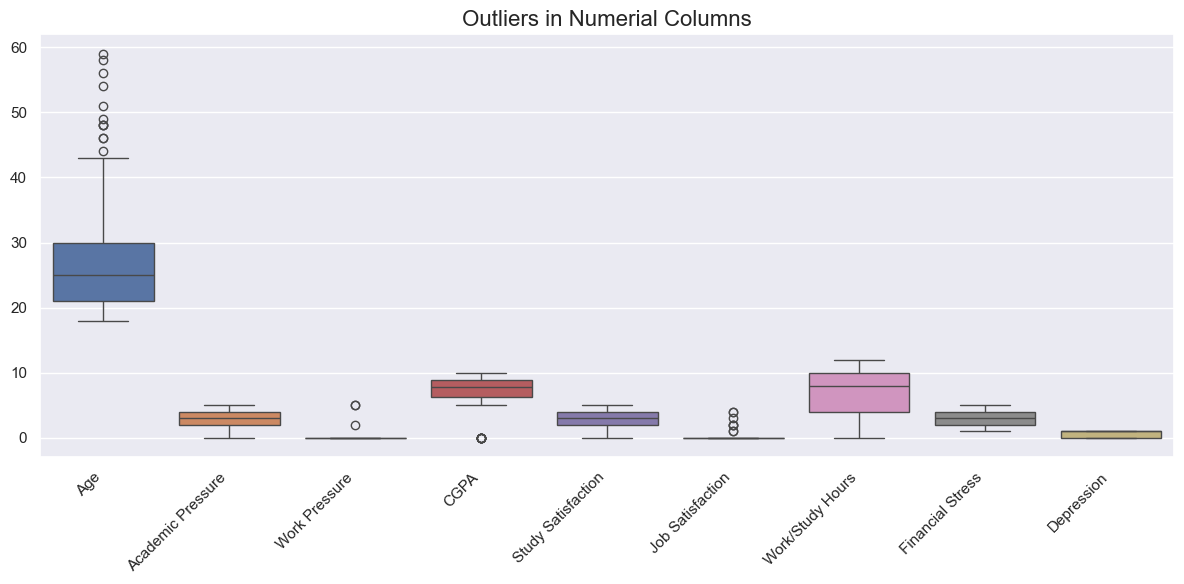

In [4]:
# Step 1: Identify numerical columns (excluding 'id')
numerical_columns = datostristes.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']  # Exclude 'id'

# Step 2: Outlier Detection using IQR method
def detect_outliers_iqr(df, numerical_columns):
    outliers = {}
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Get outliers based on IQR method
numerical_outliers = detect_outliers_iqr(datostristes, numerical_columns)

# Print outliers for numerical columns
print(f"Outliers detected in columns:")
for col, outlier_data in numerical_outliers.items():
    print(col)


# Step 3: Create a Boxplot for all numerical columns (excluding 'id')
plt.figure(figsize=(12, 6))
sns.boxplot(data=datostristes[numerical_columns])  # Only numerical columns excluding 'id'
plt.title('Outliers in Numerial Columns', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Distribución de la variables categoricas

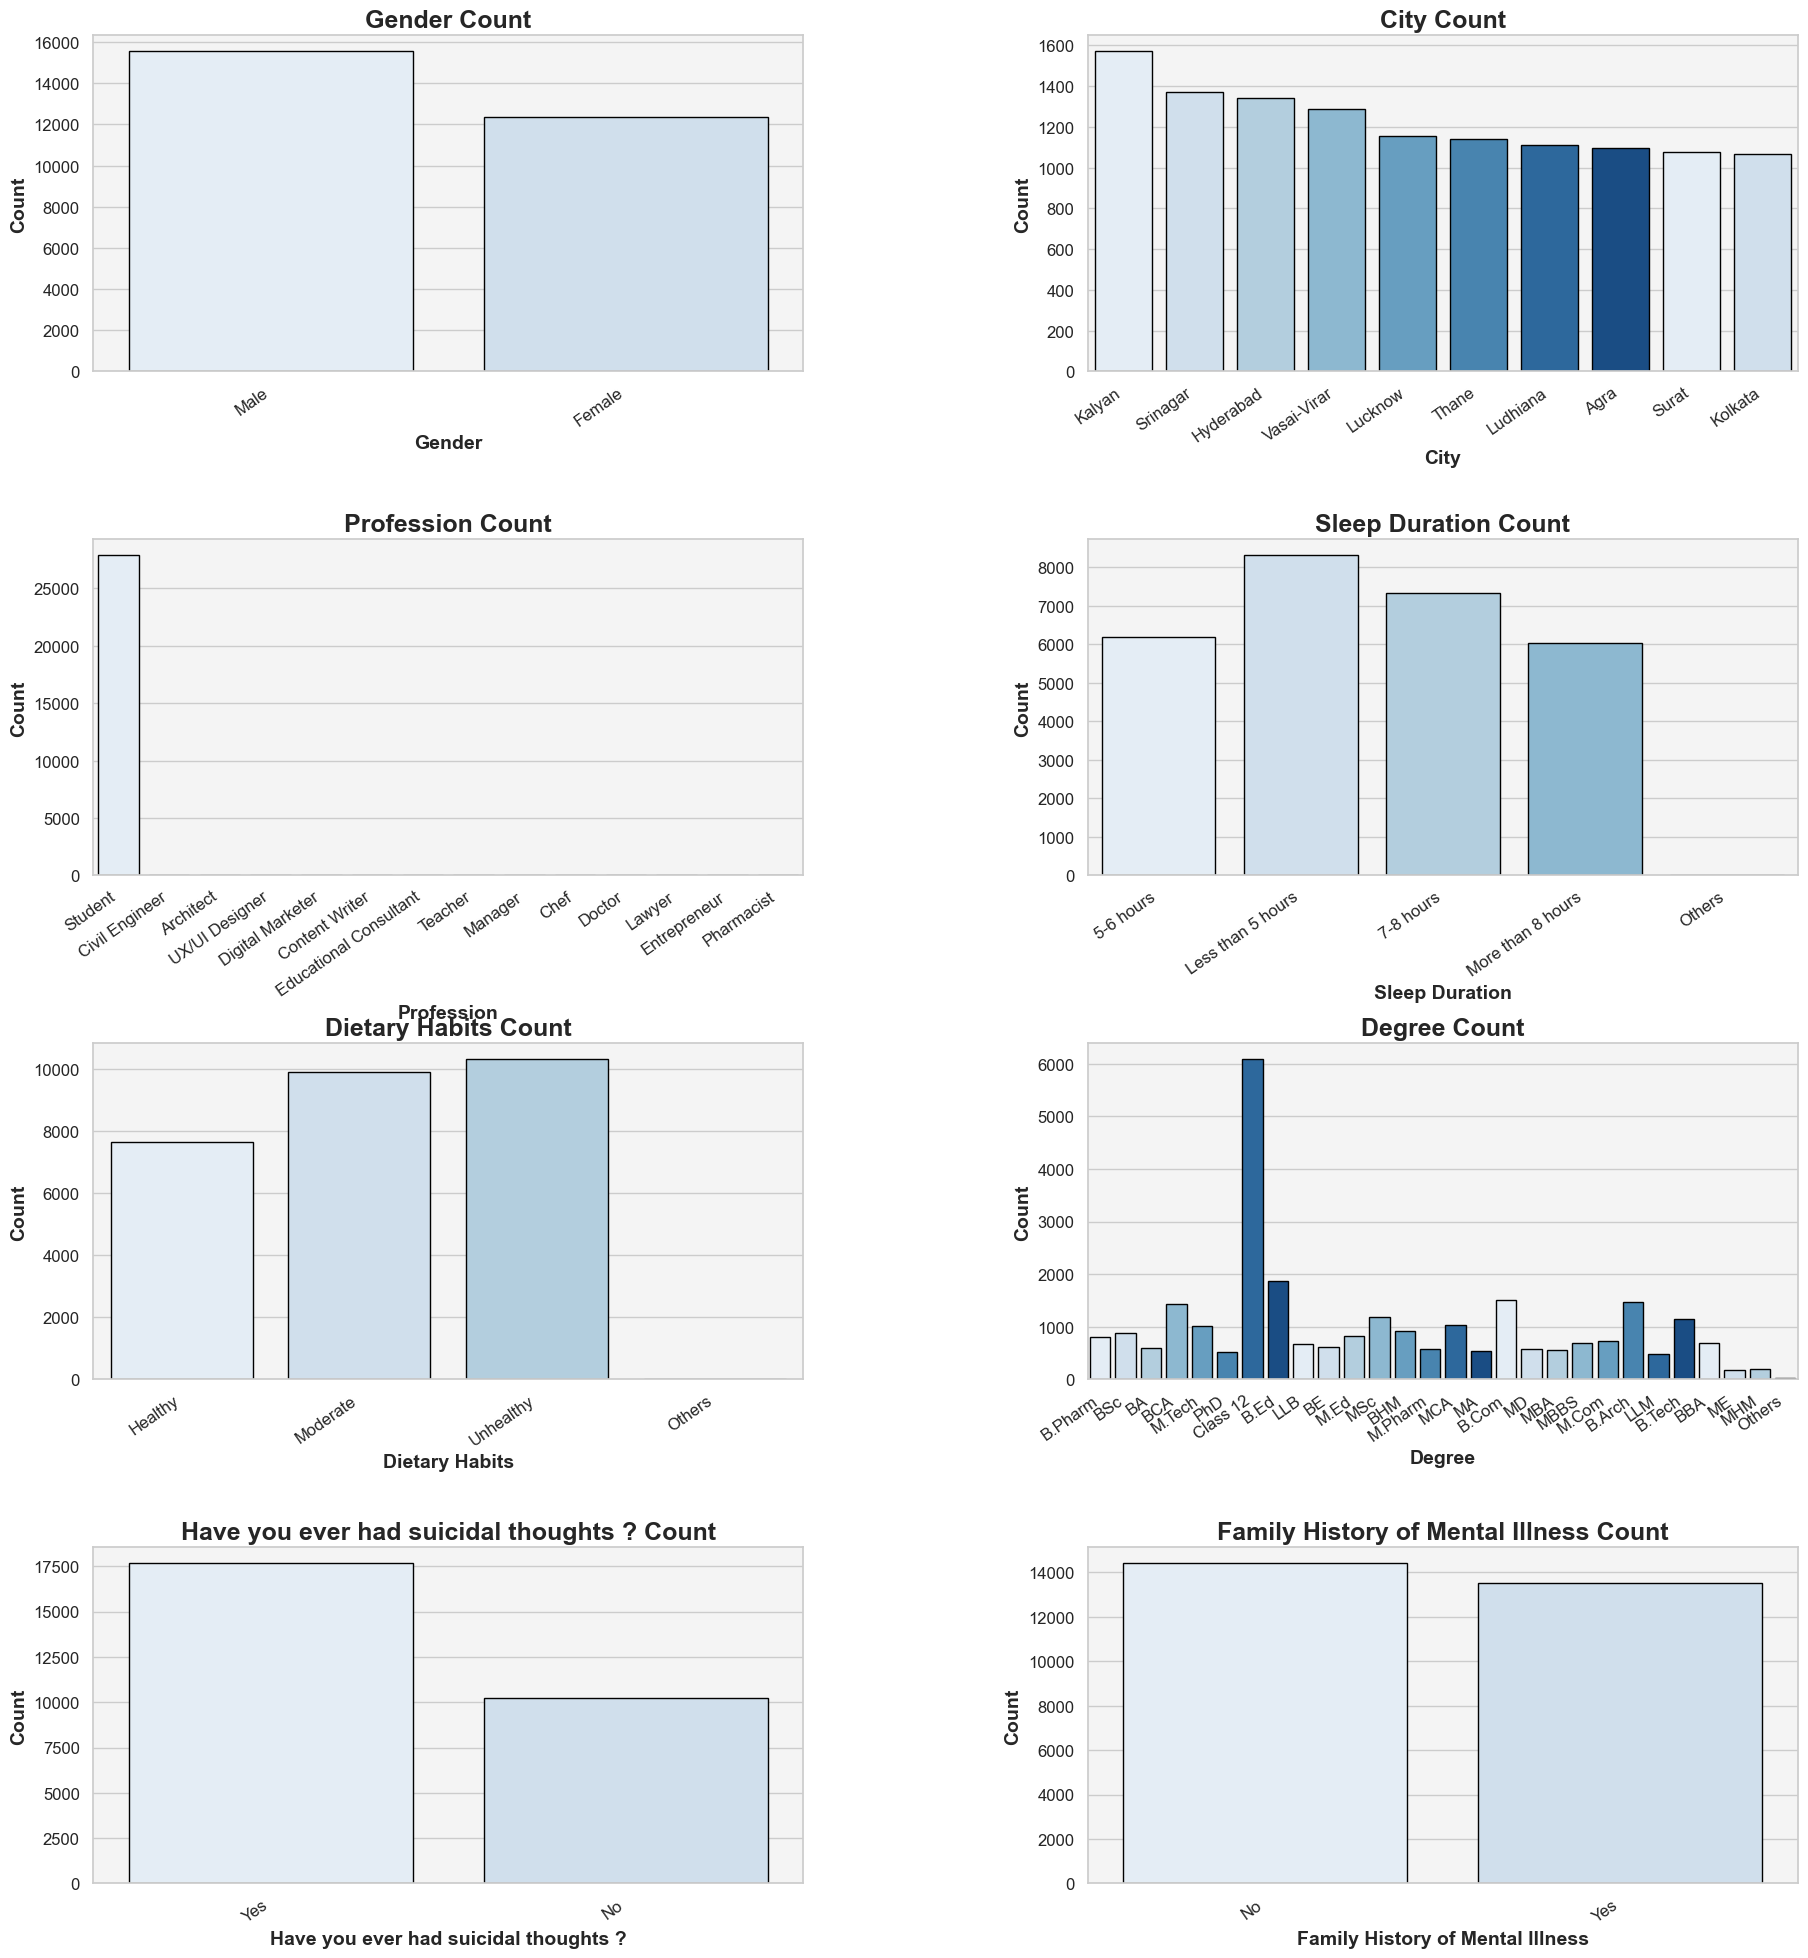

In [5]:
warnings.filterwarnings("ignore")
categorical_columns = datostristes.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col.lower() != 'id']
#Configuramos las gráficas de las gráficas
sns.set(style="whitegrid")
num_cols = 2  
num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(22, 6 * num_rows))
axes = axes.flatten()  
colors = sns.color_palette("Blues", n_colors=8)

# Graficamos las columnas categoricas
for i, col in enumerate(categorical_columns):
    if col.lower() == 'city':
        sns.countplot(data=datostristes, x=col, ax=axes[i], palette=colors, order=datostristes[col].value_counts().iloc[:10].index)  # Top 10 cities only
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')
    else:
        sns.countplot(data=datostristes, x=col, ax=axes[i], palette=colors)
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=35, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

    for label in axes[i].get_xticklabels():
        label.set_horizontalalignment('right')
    for bar in axes[i].patches:
        bar.set_edgecolor('black')

    axes[i].set_facecolor('#f4f4f4')

for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

## LIMPIEZA DE DATOS

In [6]:
datostristes = datostristes.drop(['id'], axis=1)

## CHANGING CATERORICAL TO NUMERICAL (GENDER)
datostristes.loc[datostristes['Gender'] == 'Male', 'Gender'] = 0
datostristes.loc[datostristes['Gender'] == 'Female', 'Gender'] = 1
print(len(datostristes))
datostristes.head(3)


27901


,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [7]:
datostristes['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

como podemos ver, las ciudades despresiables tienen menos de 461 ciudades

In [8]:
print("el dataset tenia: ", len(datostristes), "datos")
datos2erase=len(datostristes)
####################################################################################################
cities_to_remove = datostristes['City'].value_counts()[datostristes['City'].value_counts() < 400]
datostristes = datostristes[~datostristes['City'].isin(cities_to_remove.index)]
####################################################################################################
datoserased=len(datostristes)
erased=datos2erase-datoserased
print("Ciudades eliminadas: ",len(cities_to_remove))
print("Filas borradas: ", erased)
print(len(datostristes))
####################################################################################################
datostristes['City'].value_counts()

el dataset tenia:  27901 datos
Ciudades eliminadas:  22
Filas borradas:  26
27875


City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

In [9]:
datostristes['Profession'].value_counts()

Profession
Student                   27844
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

Borraremos a las profesiones con pocos estudiantes

In [10]:
print("el dataset tenia: ", len(datostristes), "datos")
datos2erase=len(datostristes)
####################################################################################################
datostristes = datostristes.loc[datostristes['Profession'] == 'Student']
####################################################################################################
datoserased=len(datostristes)
erased=datos2erase-datoserased
print("Filas borradas: ", erased)
print(len(datostristes))
####################################################################################################
datostristes['Profession'].value_counts()


el dataset tenia:  27875 datos
Filas borradas:  31
27844


Profession
Student    27844
Name: count, dtype: int64

In [11]:
datostristes = datostristes.drop(['Profession'], axis=1)

SE ELIMINAN LAS PROFESIONES YA QUE COMO TODOS SON ESTUDIANTES SE VUELVE IRRELEVANTE

In [12]:
datostristes['Work Pressure'].value_counts()

Work Pressure
0.0    27841
5.0        2
2.0        1
Name: count, dtype: int64

Como tienen el mismo valor de presion academica debemos de eliminar esa columna de "Work Pressure"


In [13]:
datostristes = datostristes.drop(['Work Pressure'], axis=1)
datostristes.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [14]:
datostristes['Age'].value_counts()

Age
24.0    2255
20.0    2235
28.0    2128
29.0    1940
33.0    1892
25.0    1780
21.0    1718
23.0    1640
18.0    1586
19.0    1560
34.0    1466
27.0    1459
31.0    1422
32.0    1258
22.0    1159
26.0    1153
30.0    1144
35.0      10
38.0       8
36.0       7
42.0       4
39.0       3
48.0       3
46.0       2
43.0       2
37.0       2
44.0       1
51.0       1
49.0       1
58.0       1
54.0       1
59.0       1
56.0       1
41.0       1
Name: count, dtype: int64

In [15]:
print("el dataset tenia: ", len(datostristes), "datos")
datos2erase=len(datostristes)
####################################################################################################
age2remove = datostristes['Age'].value_counts()[datostristes['Age'].value_counts() < 1000]
datostristes = datostristes[~datostristes['Age'].isin(age2remove.index)]
####################################################################################################
datoserased=len(datostristes)
erased=datos2erase-datoserased
print("Filas borradas: ", erased)
print(len(datostristes))
####################################################################################################
datostristes['Age'].value_counts()

el dataset tenia:  27844 datos
Filas borradas:  49
27795


Age
24.0    2255
20.0    2235
28.0    2128
29.0    1940
33.0    1892
25.0    1780
21.0    1718
23.0    1640
18.0    1586
19.0    1560
34.0    1466
27.0    1459
31.0    1422
32.0    1258
22.0    1159
26.0    1153
30.0    1144
Name: count, dtype: int64

Borramos los datos de que tenian pocas personas con la misma edad

In [16]:
datostristes['Academic Pressure'].value_counts()

Academic Pressure
3.0    7430
5.0    6268
4.0    5142
1.0    4783
2.0    4165
0.0       7
Name: count, dtype: int64

In [17]:
print("el dataset tenia: ", len(datostristes), "datos")
datos2erase=len(datostristes)
####################################################################################################
datostristes = datostristes.loc[datostristes['Academic Pressure'] > 0]
datoserased=len(datostristes)
erased=datos2erase-datoserased
print("Filas borradas: ", erased)
print(len(datostristes))
####################################################################################################
datostristes['Academic Pressure'].value_counts()


el dataset tenia:  27795 datos
Filas borradas:  7
27788


Academic Pressure
3.0    7430
5.0    6268
4.0    5142
1.0    4783
2.0    4165
Name: count, dtype: int64

Nos aseguramos de eliminar los que tienen 0.0 de academic preassure por ser minoria o nulos

In [18]:
datostristes['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    6338
2.0    5821
3.0    5796
1.0    5426
5.0    4404
0.0       3
Name: count, dtype: int64

In [19]:
print("el dataset tenia: ", len(datostristes), "datos")
datos2erase=len(datostristes)
####################################################################################################
datostristes = datostristes.loc[datostristes['Study Satisfaction'] > 0]
####################################################################################################
datoserased=len(datostristes)
erased=datos2erase-datoserased
print("Filas borradas: ", erased)
print(len(datostristes))
####################################################################################################
datostristes['Study Satisfaction'].value_counts()

el dataset tenia:  27788 datos
Filas borradas:  3
27785


Study Satisfaction
4.0    6338
2.0    5821
3.0    5796
1.0    5426
5.0    4404
Name: count, dtype: int64

Nos aseguramos de eliminar los que tienen 0.0 de Study satisfacction por ser minoria o nulos

In [20]:
datostristes.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [21]:
datostristes['Job Satisfaction'].value_counts()

Job Satisfaction
0.0    27783
3.0        1
2.0        1
Name: count, dtype: int64

In [22]:
datostristes = datostristes.drop(['Job Satisfaction'], axis=1)
print(len(datostristes))
datostristes.head(3)


27785


,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


eliminamos el "Job Satisfaction" porque la mayoria daba es de 0.0

In [23]:
datostristes['Sleep Duration'].value_counts()


Sleep Duration
Less than 5 hours    8281
7-8 hours            7313
5-6 hours            6152
More than 8 hours    6021
Others                 18
Name: count, dtype: int64

In [24]:
print("el dataset tenia: ", len(datostristes), "datos")
datos2erase=len(datostristes)
####################################################################################################
datostristes = datostristes.loc[datostristes['Sleep Duration'] != 'Others']
####################################################################################################
datoserased=len(datostristes)
erased=datos2erase-datoserased
print("Filas borradas: ", erased)
print(len(datostristes))
####################################################################################################
datostristes['Sleep Duration'].value_counts()

el dataset tenia:  27785 datos
Filas borradas:  18
27767


Sleep Duration
Less than 5 hours    8281
7-8 hours            7313
5-6 hours            6152
More than 8 hours    6021
Name: count, dtype: int64

Quitamos el valot de "others" de las horas de sueño porque eran muy pocos  
Ahora convertiremos las horas de sueño a datos categoricos para poder utilizarlos con facilidad

In [25]:
datostristes['Sleep Duration'] = datostristes['Sleep Duration'].apply(lambda x: 0 if x == 'Less than 5 hours' 
                                                                      else 1 if x == '5-6 hours' 
                                                                      else 2 if x == '7-8 hours' 
                                                                      else 3 if x == 'More than 8 hours' 
                                                                      else x)
print(len(datostristes))
datostristes['Sleep Duration'].value_counts()

27767


Sleep Duration
0    8281
2    7313
1    6152
3    6021
Name: count, dtype: int64

In [26]:
datostristes['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10272
Moderate      9868
Healthy       7615
Others          12
Name: count, dtype: int64

In [27]:
print("el dataset tenia: ", len(datostristes), "datos")
datos2erase=len(datostristes)
####################################################################################################
datostristes = datostristes.loc[datostristes['Dietary Habits'] != 'Others']
####################################################################################################
datoserased=len(datostristes)
erased=datos2erase-datoserased
print("Filas borradas: ", erased)
print(len(datostristes))
####################################################################################################
datostristes['Dietary Habits'].value_counts()

el dataset tenia:  27767 datos
Filas borradas:  12
27755


Dietary Habits
Unhealthy    10272
Moderate      9868
Healthy       7615
Name: count, dtype: int64

Eliminamos "others" de los datos dietary habits

In [28]:
datostristes['Dietary Habits'] = datostristes['Dietary Habits'].apply(lambda x: 0 if x == 'Healthy' 
                                                                      else 1 if x == 'Unhealthy' 
                                                                      else 2 if x == 'Moderate' 
                                                                      else x)
print(len(datostristes))
datostristes['Dietary Habits'].value_counts()

27755


Dietary Habits
1    10272
2     9868
0     7615
Name: count, dtype: int64

In [29]:
datostristes['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

Revaluaremos para acortar las opciones

In [30]:
print("el dataset tenia: ", len(datostristes), "datos")
datos2erase=len(datostristes)
####################################################################################################
datostristes['New_Degree'] = datostristes['Degree'].apply(lambda x: 'Graduated' if bool(re.search(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB', x)) 
                                                          else 'Post Graduated' if bool(re.search(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|MD|MBA|MHM|MBBS|M.Arch|M.Tech|MBA|LLM|PhD', x)) 
                                                          else 'Higher Secondary' if x == 'Class 12' 
                                                          else None)
datostristes = datostristes[datostristes['Degree'] != 'Others']
####################################################################################################
datoserased=len(datostristes)
erased=datos2erase-datoserased
print("Filas borradas: ", erased)
print(len(datostristes))
####################################################################################################
datostristes['New_Degree'].value_counts()

el dataset tenia:  27755 datos
Filas borradas:  35
27720


New_Degree
Graduated           13142
Post Graduated       8524
Higher Secondary     6054
Name: count, dtype: int64

Categorizaremos las nuevas opciones

In [31]:
datostristes['New_Degree'] = datostristes['New_Degree'].apply(lambda x: 0 if x == 'Graduated' 
                                              else 1 if x == 'Post Graduated' 
                                              else 2 if x == 'Higher Secondary' 
                                              else x)
print(len(datostristes))
datostristes['New_Degree'].value_counts()

27720


New_Degree
0    13142
1     8524
2     6054
Name: count, dtype: int64

Ahora igual analizaremos y categorizaremos los datos sobre pensamientos suicidas


In [32]:
datostristes['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    17548
No     10172
Name: count, dtype: int64

In [33]:
datostristes['Have you ever had suicidal thoughts ?'] = datostristes['Have you ever had suicidal thoughts ?'].apply(lambda x: 1 if x == 'Yes' 
                                                                                                                    else 0 if x == 'No' 
                                                                                                                    else x)
print(len(datostristes))
datostristes['Have you ever had suicidal thoughts ?'].value_counts()

27720


Have you ever had suicidal thoughts ?
1    17548
0    10172
Name: count, dtype: int64

In [34]:
datostristes['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    4214
12.0    3153
11.0    2879
8.0     2499
6.0     2238
9.0     2015
7.0     1989
0.0     1686
4.0     1600
2.0     1568
3.0     1456
5.0     1283
1.0     1140
Name: count, dtype: int64

In [35]:
datostristes['Financial Stress'].value_counts()

Financial Stress
5.0    6664
4.0    5737
3.0    5194
1.0    5086
2.0    5036
Name: count, dtype: int64

In [36]:
datostristes['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     14306
Yes    13414
Name: count, dtype: int64

In [37]:
datostristes['Family History of Mental Illness'] = datostristes['Family History of Mental Illness'].apply(lambda x: 1 if x == 'Yes' 
                                                                                                                    else 0 if x == 'No' 
                                                                                                                    else x)
print(len(datostristes))
datostristes['Family History of Mental Illness'].value_counts()

27720


Family History of Mental Illness
0    14306
1    13414
Name: count, dtype: int64

In [38]:
datostristes.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,1,0,B.Pharm,1,3.0,1.0,0,1,0
1,1,24.0,Bangalore,2.0,5.90,5.0,1,2,BSc,0,3.0,2.0,1,0,0
2,0,31.0,Srinagar,3.0,7.03,5.0,0,0,BA,0,9.0,1.0,1,0,0


Verificaremos que no haya datos nulos y los removeremos

In [39]:
datostristes.isnull().sum()
datostristes = datostristes.dropna()
datostristes_limpios=datostristes
datostristes_limpios1=datostristes
datostristes_limpios2=datostristes
print(len(datostristes))

# Tal vez Borrar las columnas de degree y city despues del encoded

27717


## Graficamos el dataset ya limpio para analizarlo

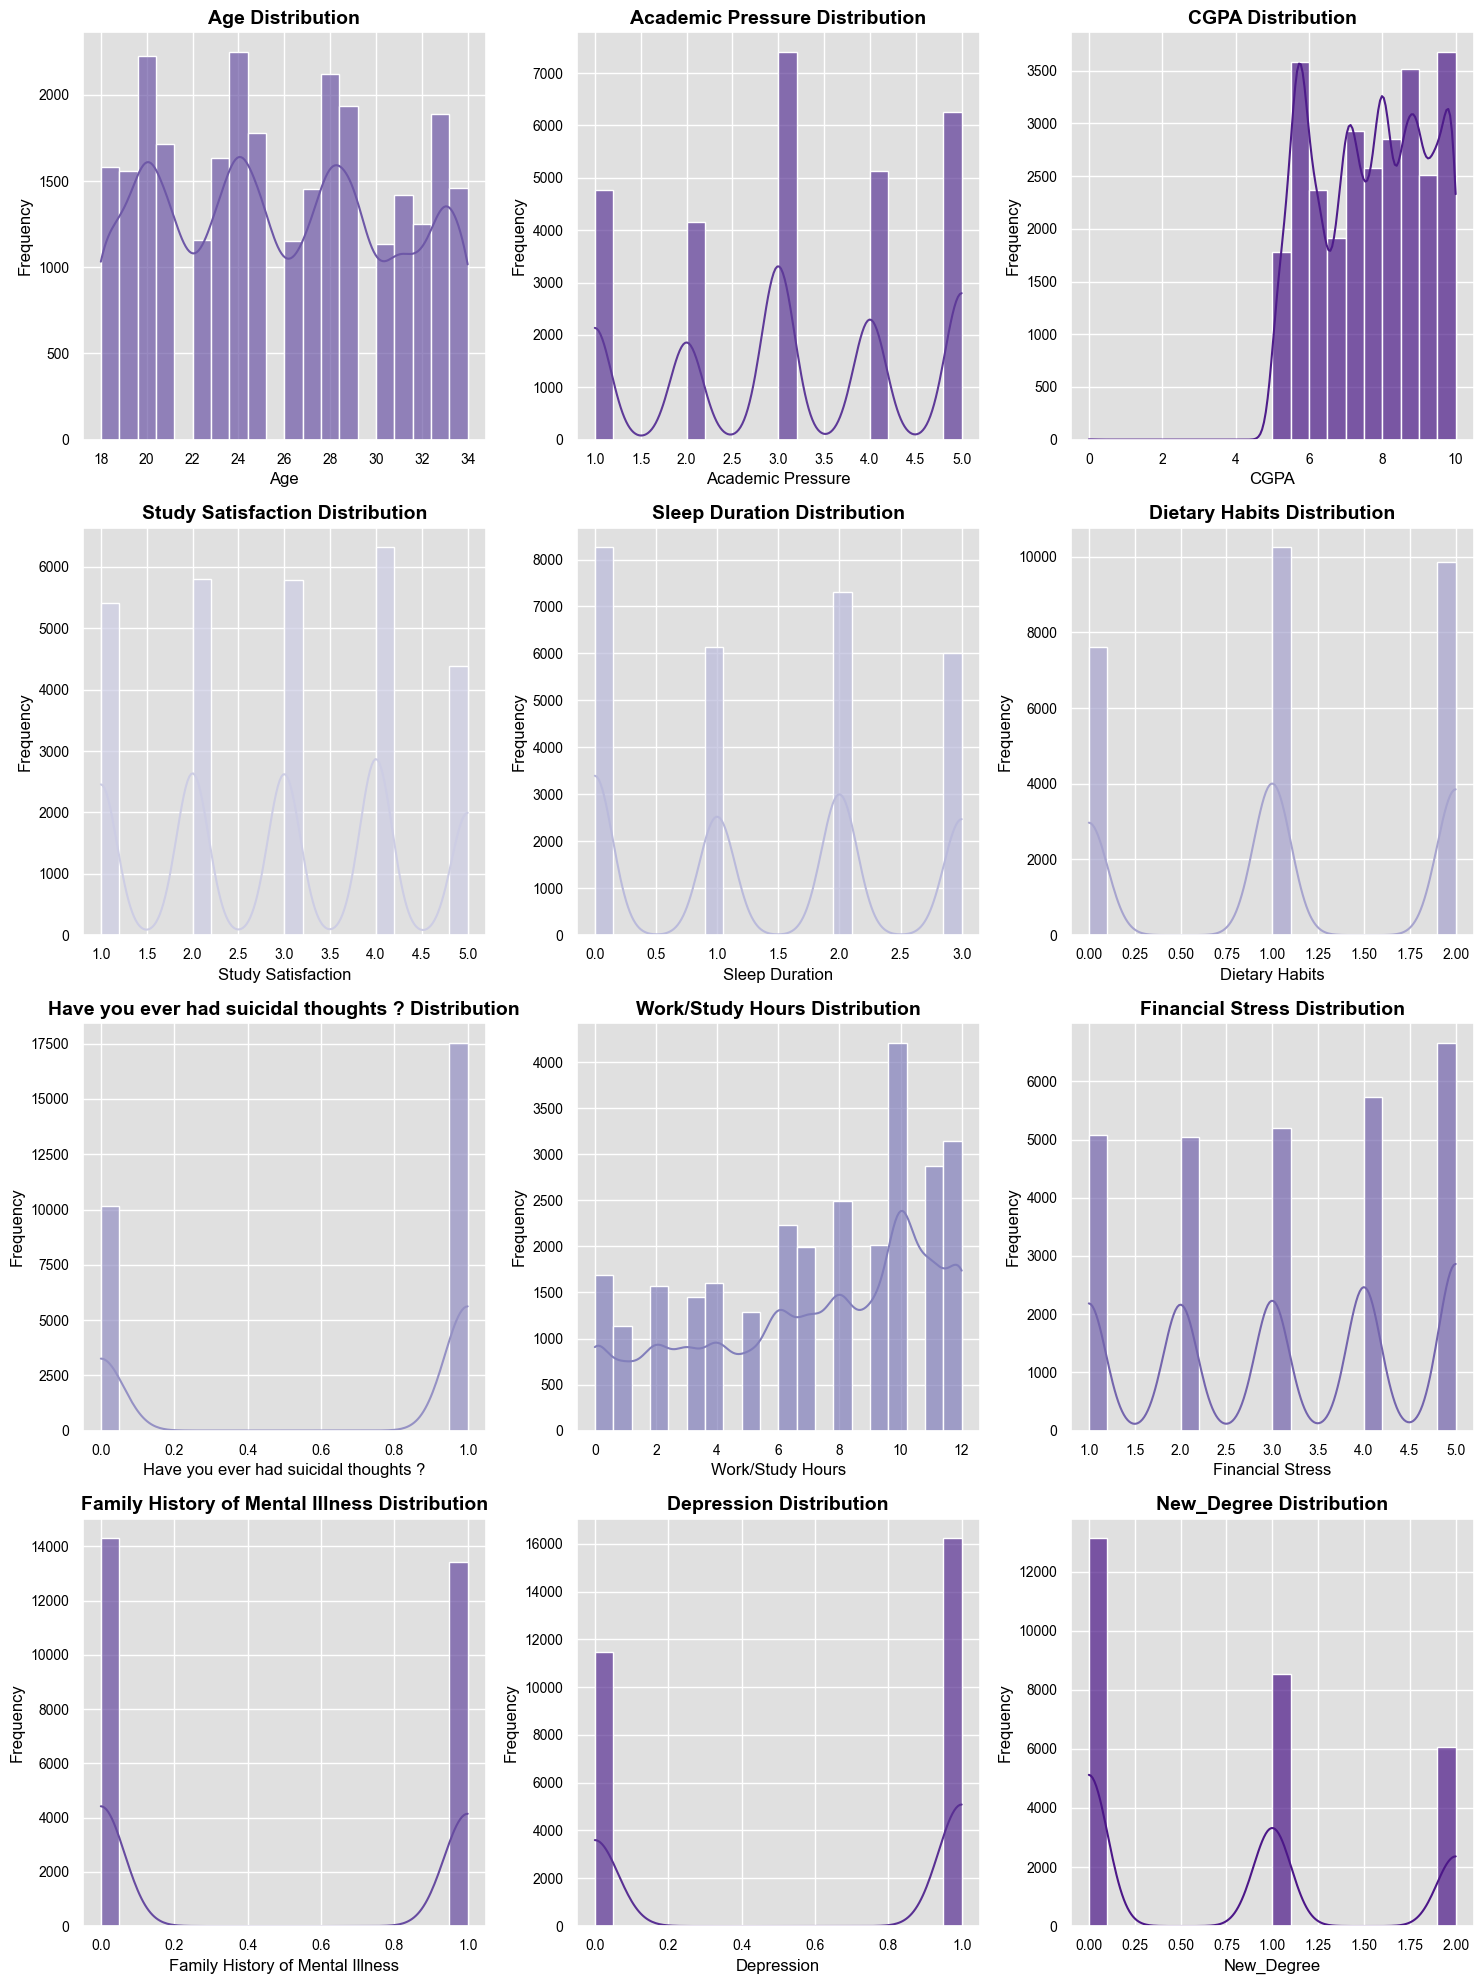

In [40]:
#analizarémos las columnas numéricas 
warnings.filterwarnings("ignore")
numerical_columns = datostristes.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']
#Configuramos las gráficas de las gráficas
sns.set(style="darkgrid")
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()
colors = sns.color_palette("Purples", num_cols)
dark_colors = sns.color_palette("Purples", 10)[7:10]  
colors[:3] = dark_colors  
# Graficamos las columnas numericas
for i, col in enumerate(numerical_columns):
    sns.histplot(datostristes[col], kde=True, bins=20, color=colors[i], ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col} Distribution', fontsize=14, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=12, color='black')
    axes[i].set_ylabel('Frequency', fontsize=12, color='black')
    axes[i].tick_params(axis='both', which='major', labelsize=10, colors='black')
    axes[i].set_facecolor('#e0e0e0')  # Light gray background for each subplot
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

creamos un dataframe para trabajar y tener respaldado el limpio


## ANALIZAR EL DATASET

In [41]:
datostristes_data = datostristes[['Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree']]
datostristes_data.head(3)
#comentar cuantos registros tiene filas y columnas

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
0,0,33.0,5.0,8.97,2.0,1,0,1,3.0,1.0,0,1,0
1,1,24.0,2.0,5.90,5.0,1,2,0,3.0,2.0,1,0,0
2,0,31.0,3.0,7.03,5.0,0,0,0,9.0,1.0,1,0,0


### Matriz de corelacion

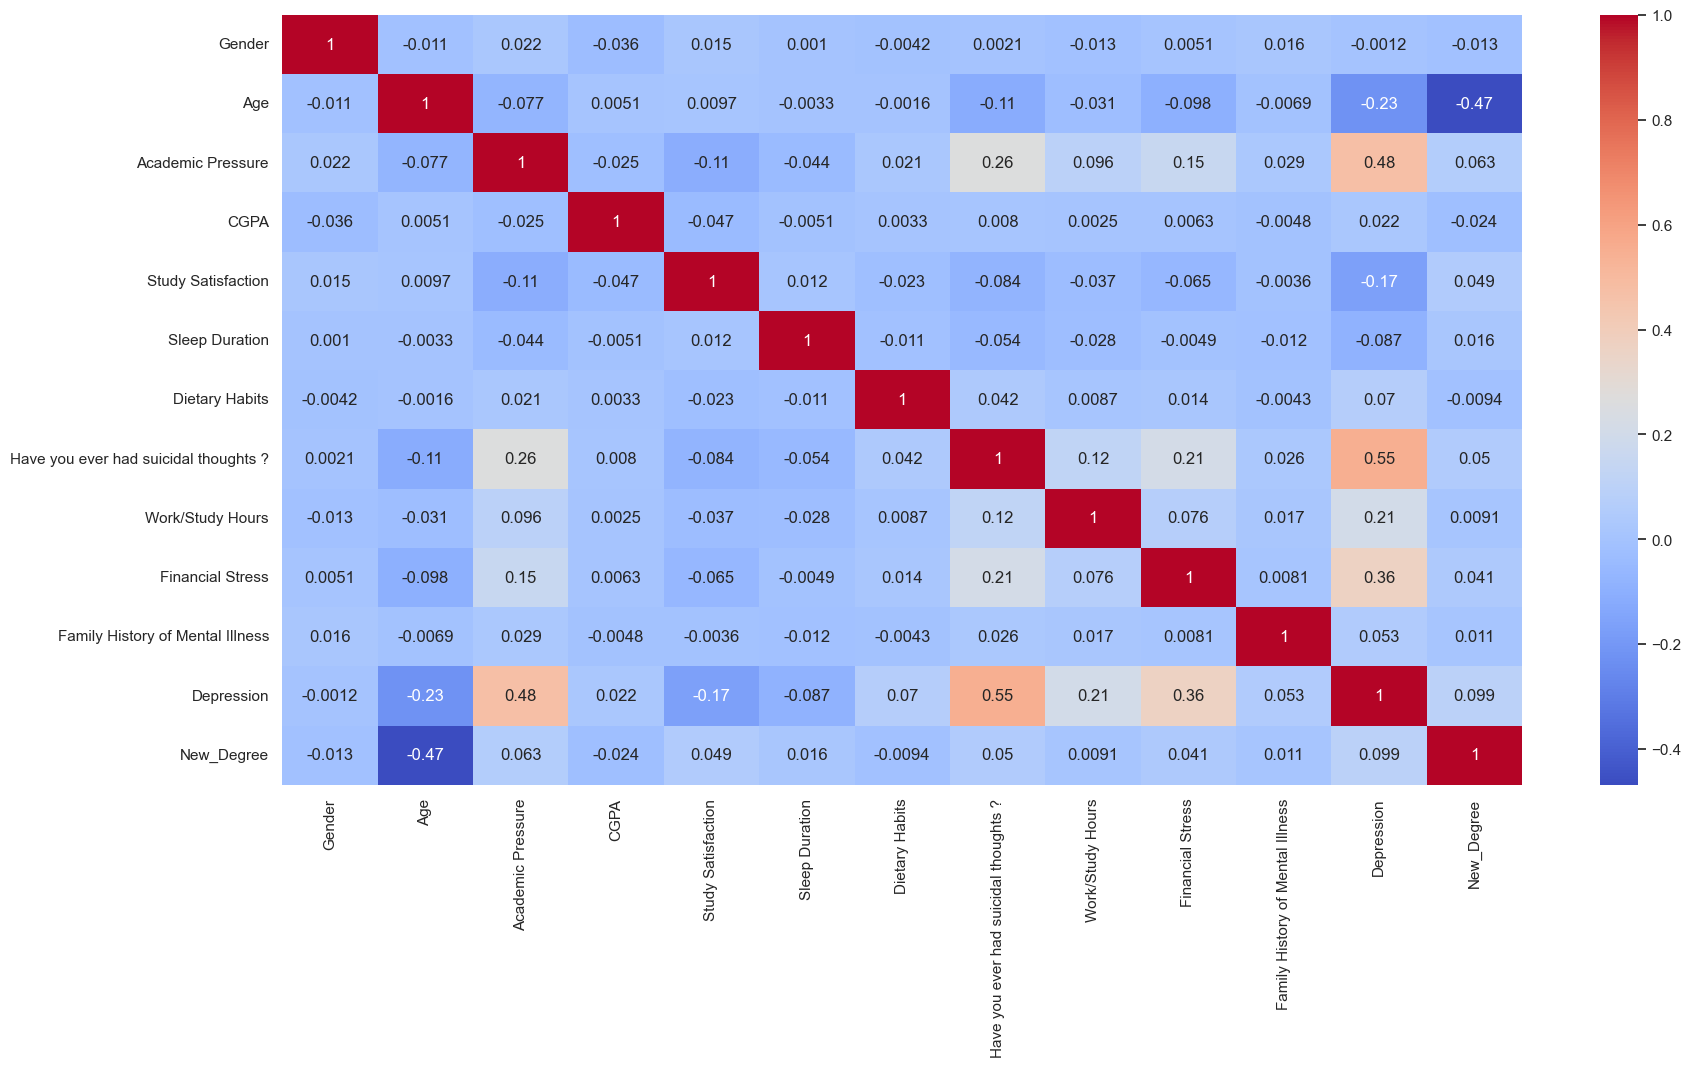

In [42]:
plt.figure(figsize=(20, 10))
sns.heatmap(datostristes_data.corr(), annot=True, cmap='coolwarm')
plt.show()

Se crea un Dummy por ciudades

In [43]:

encoder = OneHotEncoder(sparse_output=False)  
encoded = encoder.fit_transform(datostristes[['City']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['City']))
## ADJUSTING THE INDEX
encoded_df.index = datostristes.index
datostristes_encoded = pd.concat([datostristes, encoded_df], axis=1)

## CHECKING THE NEW DF
datostristes_encoded.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree', 'City_Agra', 'City_Ahmedabad', 'City_Bangalore',
       'City_Bhopal', 'City_Chennai', 'City_Delhi', 'City_Faridabad',
       'City_Ghaziabad', 'City_Hyderabad', 'City_Indore', 'City_Jaipur',
       'City_Kalyan', 'City_Kanpur', 'City_Kolkata', 'City_Lucknow',
       'City_Ludhiana', 'City_Meerut', 'City_Mumbai', 'City_Nagpur',
       'City_Nashik', 'City_Patna', 'City_Pune', 'City_Rajkot',
       'City_Srinagar', 'City_Surat', 'City_Thane', 'City_Vadodara',
       'City_Varanasi', 'City_Vasai-Virar', 'City_Visakhapatnam'],
      dtype='object')

Quitamos las ciudades y "Degree" que es la columna de las carreras que cambiamos con funcion lambda

In [44]:
datostristes_encoded = datostristes_encoded.drop(['City', 'Degree'], axis=1)

## Clasificación

### Para predecir la depresión SVM

In [45]:
X = datostristes_encoded.drop('Depression', axis=1).values  # Features
y = datostristes_encoded['Depression'].values  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = SVC(random_state=1234)
model.fit(X_train_scaled, y_train)
score = model.score(X_test_scaled, y_test)
print(f"Accuracy: {score*100:.2f}%")

Accuracy: 84.56%


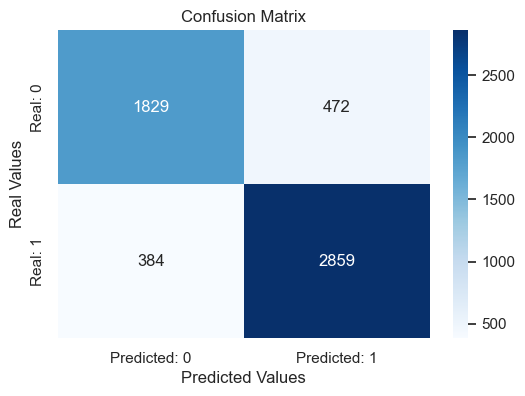

In [46]:
## PLLOTING THE CONFUSION MATRIX
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Real: 0', 'Real: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2301
           1       0.86      0.88      0.87      3243

    accuracy                           0.85      5544
   macro avg       0.84      0.84      0.84      5544
weighted avg       0.85      0.85      0.85      5544



#### Buscando hiper parametros para SVM

##### kernel rbf

In [48]:
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
#'poly' se queda ahi como sfuncionara pero no avanza, 'rbf' si, 'linear' si, 'sigmoid'si, 'precomputed'
#grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3,cv=5)
#grid.fit(X_train, y_train)
#best_C = grid.best_params_['C']
#best_gamma = grid.best_params_['gamma']
#print("SVM best C : " + str(best_C))
#print("SVM best gamma : " + str(best_gamma))
#print(grid.best_params_)
#print(grid.best_estimator_)
#print(grid.best_score_)

SVM best gamma : 0.001

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

SVC(C=100, gamma=0.001)

0.8460291515953132

In [49]:
#SVM_best = SVC(kernel='rbf', C=best_C,gamma=best_gamma)
#SVM_best.fit(X_train, y_train);
#Y_pred = SVM_best.predict(X_test)
# confusion matrix
#cm = confusion_matrix(y_test, Y_pred)
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#plt.xlabel('Predicted')
#plt.ylabel('Truth')
#plt.show()
###
#print(classification_report(y_test, Y_pred))

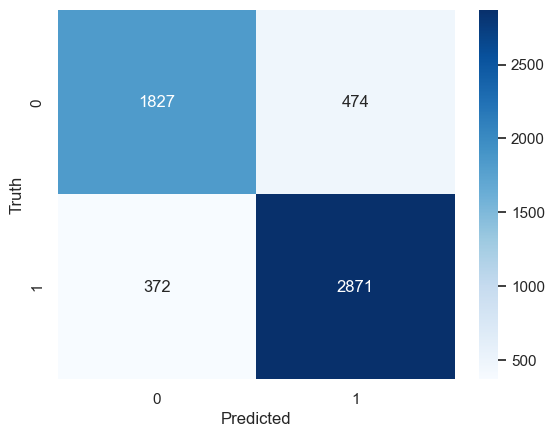

                  precision    recall  f1-score   support

               0       0.83      0.79      0.81      2301
               1       0.86      0.89      0.87      3243

         accuracy                           0.85      5544
         macro avg       0.84      0.84      0.84      5544
         weighted avg       0.85      0.85      0.85      5544

##### kernel linear

In [50]:
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear']}
#'poly' se queda ahi como sfuncionara pero no avanza, 'rbf' si, 'linear' si, 'sigmoid'si, 'precomputed'
#grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3,cv=5)
#grid.fit(X_train, y_train)
#best_C = grid.best_params_['C']
#best_gamma = grid.best_params_['gamma']
#print("SVM best C : " + str(best_C))
#print("SVM best gamma : " + str(best_gamma))
#print(grid.best_params_)
#print(grid.best_estimator_)
#print(grid.best_score_)

SVM best gamma : 1

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

SVC(C=1, gamma=1, kernel='linear')

0.8453975760737847

In [51]:
#SVM_best = SVC(kernel='linear', C=best_C,gamma=best_gamma)
#SVM_best.fit(X_train, y_train);
#Y_pred = SVM_best.predict(X_test)
# confusion matrix
#cm = confusion_matrix(y_test, Y_pred)
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#plt.xlabel('Predicted')
#plt.ylabel('Truth')
#plt.show()
###
#print(classification_report(y_test, Y_pred))

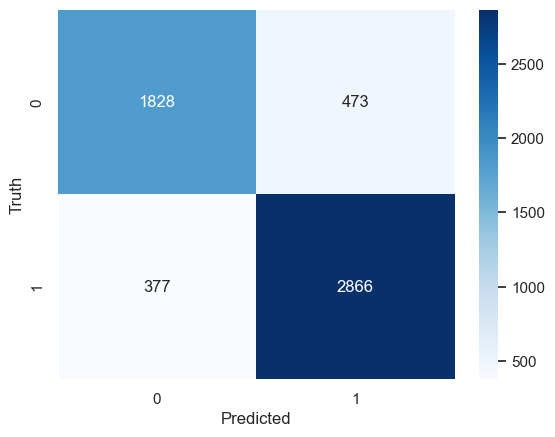

            precision    recall  f1-score   support

           0       0.83      0.79      0.81      2301
           1       0.86      0.88      0.87      3243

        accuracy                           0.85      5544
        macro avg       0.84      0.84      0.84      5544
        weighted avg       0.85      0.85      0.85      5544


##### kernel sigmoid

In [52]:
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['sigmoid']}
#'poly' se queda ahi como sfuncionara pero no avanza, 'rbf' si, 'linear' si, 'sigmoid'si, 'precomputed'
#grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3,cv=5)
#grid.fit(X_train, y_train)
#best_C = grid.best_params_['C']
#best_gamma = grid.best_params_['gamma']
#print("SVM best C : " + str(best_C))
#print("SVM best gamma : " + str(best_gamma))
#print(grid.best_params_)
#print(grid.best_estimator_)
#print(grid.best_score_)

SVM best gamma : 0.0001

{'C': 100, 'gamma': 0.0001, 'kernel': 'sigmoid'}

SVC(C=100, gamma=0.0001, kernel='sigmoid')

0.8452172639524754

In [53]:
#SVM_best = SVC(kernel='sigmoid', C=best_C,gamma=best_gamma)
#SVM_best.fit(X_train, y_train);
#Y_pred = SVM_best.predict(X_test)
# confusion matrix
#cm = confusion_matrix(y_test, Y_pred)
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#plt.xlabel('Predicted')
#plt.ylabel('Truth')
#plt.show()
###
#print(classification_report(y_test, Y_pred))

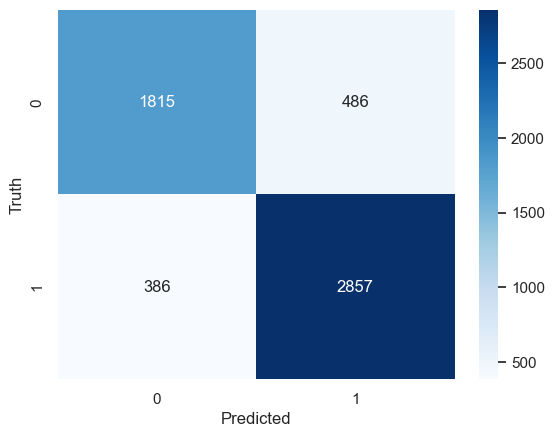

            precision    recall  f1-score   support

           0       0.82      0.79      0.81      2301
           1       0.85      0.88      0.87      3243

         accuracy                           0.84      5544
         macro avg       0.84      0.83      0.84      5544
        weighted avg       0.84      0.84      0.84      5544

### Comparando modelos de clasificación

  File "c:\Users\oscar\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\oscar\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\oscar\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\oscar\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1540, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


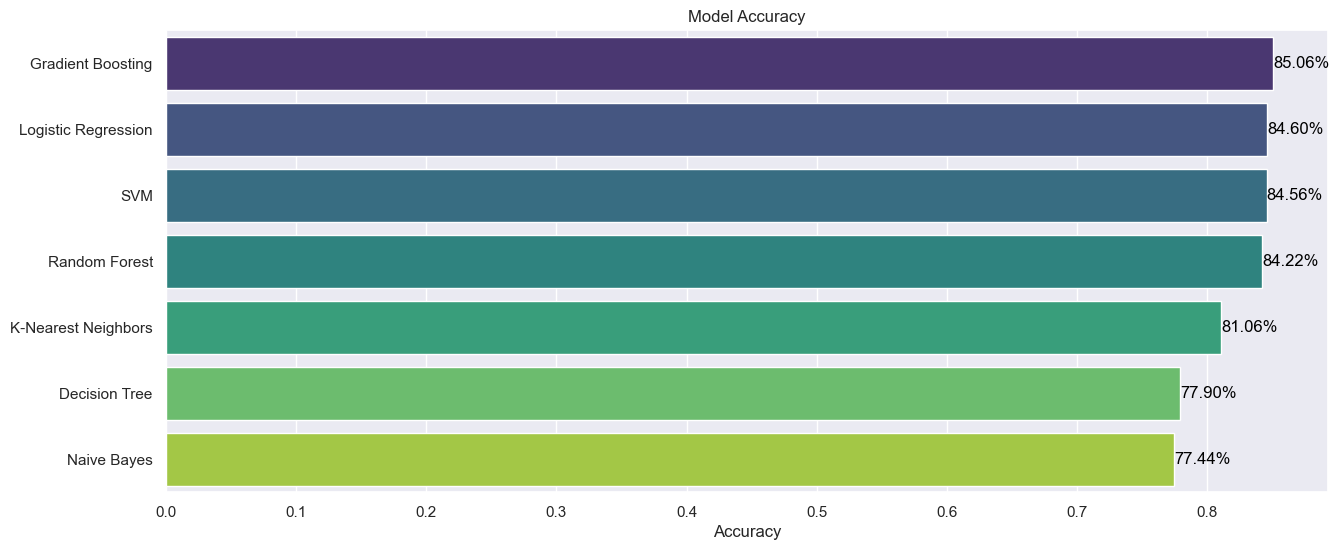

In [54]:
## COMPARING MULTIPLE MODELS TO CHECK THE BEST ONE
## MODELS
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
## MODELS TO BE COMPARED
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=1234),
    "Random Forest": RandomForestClassifier(random_state=1234),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1234),
    "SVM": SVC(random_state=1234),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
}
## TRAINING THE MODELS AND STORING THE ACCURACY
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)  
    y_pred = model.predict(X_test_scaled) 
    accuracy = accuracy_score(y_test, y_pred)  
    accuracy_results[name] = accuracy 

## ORDERING THE ACCURACY RESULTS FROM HIGHEST TO LOWEST
accuracy_results_ordened = dict(sorted(accuracy_results.items(), key=lambda item: item[1], reverse=True))


## PLOTTING THE ACCURACY OF EACH MODEL ORDERING BY HIGHEST ACCURACY AND ADDING THE ACCURACY VALUE ABOVE THE BARS
plt.figure(figsize=(15, 6))
sns.barplot(x=list(accuracy_results_ordened.values()), 
            y=list(accuracy_results_ordened.keys()), 
            palette='viridis')
plt.xlabel('Accuracy')
plt.title('Model Accuracy')

## LABELS
for i, v in enumerate(accuracy_results_ordened.values()):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')
plt.show()

- Como podemos notar en la gráfica anterior es mejor aplicar el modelo Gradient Boosting

### Clasificación con el modelo Gradient Boosting

In [55]:
# Definir los hiperparámetros a ajustar
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'learning_rate': [0.01, 0.1, 0.2],
#    'max_depth': [3, 4, 5],
#    'subsample': [0.8, 0.9, 1.0]
#}
# Crear el modelo
#gb = GradientBoostingClassifier()
#grid_search = GridSearchCV(gb, param_grid, cv=5)
#grid_search.fit(X_train, y_train)
# Obtener los mejores hiperparámetros
#best_params = grid_search.best_params_
# Obtener el mejor modelo
#best_gb = grid_search.best_estimator_
##### error ############
#print(best_params)
#print(best_gb)
#print(grid_search.best_score_)



**{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}

GradientBoostingClassifier(n_estimators=300, subsample=0.8)


0.8474722282821225**

- se supone que al implementar el hiperparametro el accuracy mejora pero bajo de 85.06 a 84.74

In [56]:
X = datostristes_encoded.drop('Depression', axis=1).values  # Features
y = datostristes_encoded['Depression'].values  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = GradientBoostingClassifier(random_state=1234)
model.fit(X_train_scaled, y_train)
score = model.score(X_test_scaled, y_test)
print(f"Accuracy: {score*100:.2f}%")

Accuracy: 85.06%


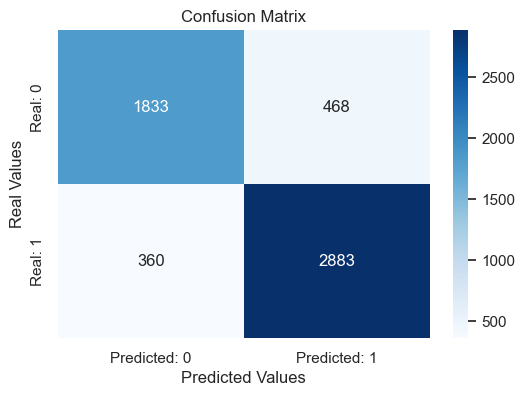

In [57]:
## PLLOTING THE CONFUSION MATRIX
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Real: 0', 'Real: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.show()

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2301
           1       0.86      0.89      0.87      3243

    accuracy                           0.85      5544
   macro avg       0.85      0.84      0.85      5544
weighted avg       0.85      0.85      0.85      5544



## Agrupamiento

### Modelo de Mezcla Gaussiana para CGPA (Promedio de Los estudiantes)

In [59]:
cgpa = datostristes_limpios['CGPA'].values.reshape(-1, 1)
n_components = 5  
gmm = GaussianMixture(n_components=n_components, random_state=0)

In [60]:
# Entrenamiento del modelo
gmm.fit(cgpa)
labels = gmm.predict(cgpa)

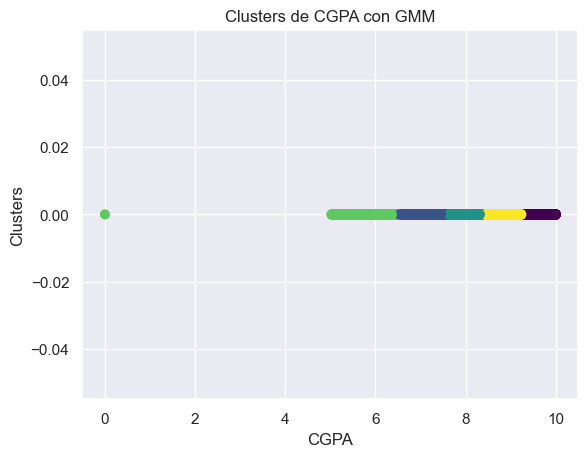

medias de los cluster: 
 [[9.67577476]
 [7.06948973]
 [7.96939331]
 [5.77977502]
 [8.8167865 ]]
varianzas de los cluster: 
 [[[0.06096691]]

 [[0.10531485]]

 [[0.07363258]]

 [[0.15991874]]

 [[0.07523781]]]


In [61]:
# Visualización de clusters
plt.scatter(cgpa, np.zeros_like(cgpa), c=labels, cmap='viridis')
plt.title('Clusters de CGPA con GMM')
plt.xlabel('CGPA')
plt.ylabel('Clusters')
plt.show()
#Analisis de los clusters
print("medias de los cluster: \n",gmm.means_)
print("varianzas de los cluster: \n", gmm.covariances_)

- Las medias de los clusters indican que hay grupos de estudiantes con CGPA altos (cercanos a 9.6), medios (alrededor de 7 y 8) y bajos (cercanos a 5.7).
- Se observa que las varianzas son relativamente bajas, lo que indica que los valores de CGPA dentro de cada cluster están bastante agrupados.


### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) para "Academic Pressure" 

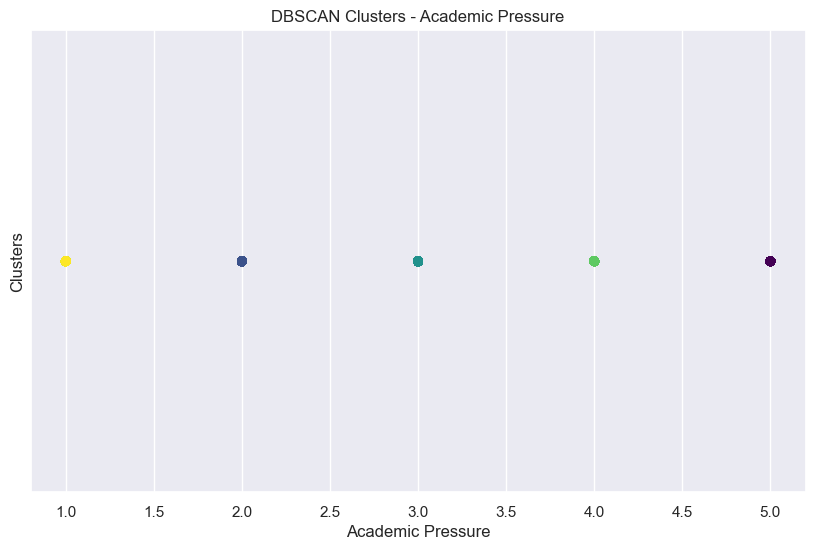

Número de clusters para Academic Pressure: 5
Número de puntos de ruido para Academic Pressure: 0


In [62]:
X = datostristes_limpios2["Academic Pressure"].values.reshape(-1, 1)
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta eps y min_samples
labels = dbscan.fit_predict(X_scaled)
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, [0] * len(X), c=labels, cmap='viridis')  # Visualizar en 1D
plt.title(f'DBSCAN Clusters - {"Academic Pressure"}')
plt.xlabel("Academic Pressure")
plt.ylabel('Clusters')
plt.yticks([])  # Ocultar las marcas del eje y
plt.show()
# Análisis de los clusters
unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0) # -1 representa el ruido
n_noise = list(labels).count(-1)
print(f"Número de clusters para {"Academic Pressure"}: {n_clusters}")
print(f"Número de puntos de ruido para {"Academic Pressure"}: {n_noise}")


- Esto significa que todos los datos estan agrupados sin outlayers 
- Se creo un cluster para cada opción de presión academica

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) para  "Work/Study Hours"

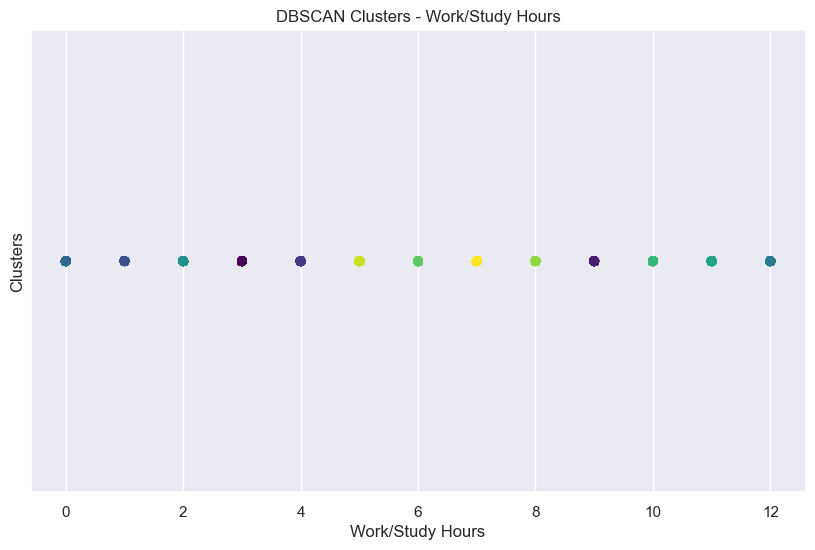

Número de clusters para Work/Study Hours: 13
Número de puntos de ruido para Work/Study Hours: 0


In [63]:
X = datostristes_limpios2["Work/Study Hours"].values.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=3)  # Ajusta eps y min_samples
labels = dbscan.fit_predict(X_scaled)
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, [0] * len(X), c=labels, cmap='viridis')  # Visualizar en 1D
plt.title(f'DBSCAN Clusters - {"Work/Study Hours"}')
plt.xlabel("Work/Study Hours")
plt.ylabel('Clusters')
plt.yticks([])  # Ocultar las marcas del eje y
plt.show()
# Análisis de los clusters
unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0) # -1 representa el ruido
n_noise = list(labels).count(-1)
print(f"Número de clusters para {"Work/Study Hours"}: {n_clusters}") 
print(f"Número de puntos de ruido para {"Work/Study Hours"}: {n_noise}")

- Esto significa que todos los datos estan agrupados sin outlayers
- Se creo un cluster para cada opción de horas de sueño

## Regresión